In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipdb
import deep_gravity_utils as dgu

# Deep Gravity 

In [45]:
big_res_df = pd.DataFrame(columns=['mae', 'mape', 'smape', 'nrmse', 'nmae'])

for i in range(25):
    run = i + 1
    path = './runs/run%i/'%run
    res_run = pd.read_csv(path+'result_df.csv', index_col=0)
    big_res_df.loc[i, :] = res_run.values

big_res_df.loc['mean', :] = big_res_df.mean().values
big_res_df.loc['std', :] = big_res_df.std().values

big_res_df.to_csv('./res/dg and g/results_dg_25_runs.csv')

big_res_df.loc[['mean', 'std']]

,mae,mape,smape,nrmse,nmae
mean,0.098111,5.43498,0.818282,0.145371,0.098111
std,0.004917,0.836426,0.021611,0.008021,0.004917


In [46]:
OD = np.load('./data/3d_daily.npy').sum(axis=2)[:48, :48]
OD_max = OD.max(axis=1).reshape(-1, 1)
OD_max_pred = OD_max[-14:]

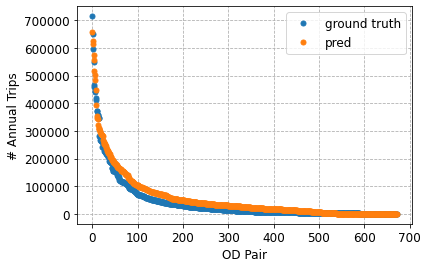

In [47]:
run = 22
path = './runs/run%i/'%run
pred = np.load(path+'pred.npy')[-14*48:]
labels = np.load('./res/dg and g/labels.npy')[-14*48:]

pred = (pred.reshape(14, 48) * OD_max_pred).reshape(-1, 1)
labels = (labels.reshape(14, 48) * OD_max_pred).reshape(-1, 1)

pred_df = pd.DataFrame(pred).sort_values(by=0, ascending=False)
pred_df.index = range(pred_df.shape[0])
labels_df = pd.DataFrame(labels).sort_values(by=0, ascending=False)
labels_df.index = range(labels_df.shape[0])

fig_res = plt.figure()
ax0 = fig_res.add_subplot(1, 1, 1)
ax0.plot(labels_df[0], '.', label='ground truth', ms=10)
ax0.plot(pred_df[0], '.', label='pred', ms=10)
ax0.set_xlabel('OD Pair', fontsize=12)
ax0.set_ylabel('# Annual Trips', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(ls='--')

In [81]:
m = 0.0

print('The mae loss is %.4f'%dgu.mae_loss_func(pred, labels, m))
print('The mape loss is %.4f'%dgu.mape_loss_func(pred, labels, m))
print('The smape loss is %.4f'%dgu.smape_loss_func(pred, labels, m))
print('The nrmse loss is %.4f'%dgu.nrmse_loss_func(pred, labels, m))
print('The nmae loss is %.4f'%dgu.nmae_loss_func(pred, labels, m))

The mae loss is 31663.8691
The mape loss is 4.7758
The smape loss is 0.8337
The nrmse loss is 0.0785
The nmae loss is 0.0443


# Gravity

In [51]:
g_pred_df = pd.read_csv('./res/dg and g/g_pred.csv', index_col=0)
g_pred = g_pred_df['0'].values[-14*48:].reshape(-1, 1)
g_pred.shape

(672, 1)

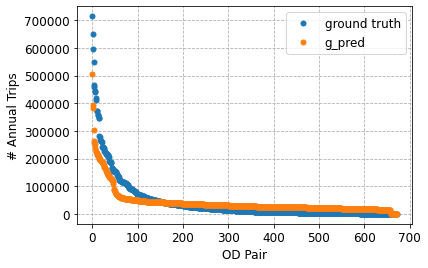

In [53]:
labels = np.load('./res/dg and g/labels.npy')[-14*48:]

labels = (labels.reshape(14, 48) * OD_max_pred).reshape(-1, 1)

g_pred_df = pd.DataFrame(g_pred).sort_values(by=0, ascending=False)
g_pred_df.index = range(g_pred_df.shape[0])
labels_df = pd.DataFrame(labels).sort_values(by=0, ascending=False)
labels_df.index = range(labels_df.shape[0])

fig_res = plt.figure()
ax0 = fig_res.add_subplot(1, 1, 1)
ax0.plot(labels_df[0], '.', label='ground truth', ms=10)
ax0.plot(g_pred_df[0], '.', label='g_pred', ms=10)
ax0.set_xlabel('OD Pair', fontsize=12)
ax0.set_ylabel('# Annual Trips', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(ls='--')

In [78]:
m = 0.0

print('The mae loss is %.4f'%dgu.mae_loss_func(g_pred, labels, m))
print('The mape loss is %.4f'%dgu.mape_loss_func(g_pred, labels, m))
print('The smape loss is %.4f'%dgu.smape_loss_func(g_pred, labels, m))
print('The nrmse loss is %.4f'%dgu.nrmse_loss_func(g_pred, labels, m))
print('The nmae loss is %.4f'%dgu.nmae_loss_func(g_pred, labels, m))

The mae loss is 55596.9690
The mape loss is 17.3799
The smape loss is 1.1917
The nrmse loss is 0.1396
The nmae loss is 0.0778


/Users/kaihangzhang/Downloads/GitHub/BART_Ridership_Prediction/deep_gravity_utils.py:11: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(eliminate_nan(np.fabs(labels[mask]-preds[mask])/labels[mask]))


# Two models in one graph

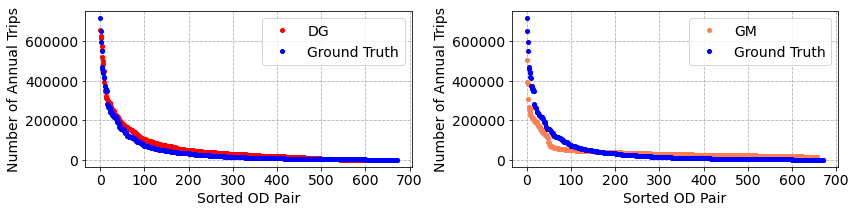

In [77]:
run = 22
path = './runs/run%i/'%run
pred = np.load(path+'pred.npy')[-14*48:]
labels = np.load('./res/dg and g/labels.npy')[-14*48:]

pred = (pred.reshape(14, 48) * OD_max_pred).reshape(-1, 1)
labels = (labels.reshape(14, 48) * OD_max_pred).reshape(-1, 1)

g_pred_df = pd.DataFrame(g_pred).sort_values(by=0, ascending=False)
g_pred_df.index = range(g_pred_df.shape[0])
pred_df = pd.DataFrame(pred).sort_values(by=0, ascending=False)
pred_df.index = range(pred_df.shape[0])
labels_df = pd.DataFrame(labels).sort_values(by=0, ascending=False)
labels_df.index = range(labels_df.shape[0])

ms = 8
fs = 14
fig_res = plt.figure(figsize=[12, 3])
ax0 = fig_res.add_subplot(1, 2, 1)
ax0.plot(pred_df[0], '.', label='DG', ms=ms, c='red')
ax0.plot(labels_df[0], '.', label='Ground Truth', ms=ms, c='blue')
ax0.set_xlabel('Sorted OD Pair', fontsize=fs)
ax0.set_ylabel('Number of Annual Trips', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax0.legend(fontsize=fs)
ax0.grid(ls='--')

ax1 = fig_res.add_subplot(1, 2, 2)
ax1.plot(g_pred_df[0], '.', label='GM', ms=ms, c='coral')
ax1.plot(labels_df[0], '.', label='Ground Truth', ms=ms, c='blue')
ax1.set_xlabel('Sorted OD Pair', fontsize=fs)
ax1.set_ylabel('Number of Annual Trips', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax1.legend(fontsize=fs)
ax1.grid(ls='--')

plt.tight_layout()
fig_res.savefig('./res/dg and g/res.png', dpi=500)